In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from os.path import abspath, dirname, join
from os import getcwd


PARENT_DIR = dirname(getcwd())

with open(join(PARENT_DIR,'cultivar_models/Skyfall_Yield_model_daily_3d.pck'), 'rb') as pfile1:
    skyfall = pickle.load(pfile1)

df = pd.read_csv(join(PARENT_DIR, 'All_Cultivars_Spreadsheets/all_cultivars.csv'))

print(df)

# read in the weather, calculate avg weather for region/area/site/ year

      Cultivar            Region    Region County       Lat    Long  Year  \
0       Access             OLD'M             ABER  57.33492 -2.3199  2002   
1       Access            Ragnal  Nottinghamshire  53.25560 -0.7963  2004   
2       Access  Little Staughton     Bedfordshire  52.25040 -0.3821  2004   
3       Access          Limavady      Londonderry  55.04550 -6.9337  2003   
4       Access          Limavady           LDERRY  55.04550 -6.9337  2002   
...        ...               ...              ...       ...     ...   ...   
16861     Zulu               Wye             Kent  51.18190  0.9379  2015   
16862     Zulu            Callow           Herefd  52.00510 -2.7385  2017   
16863     Zulu            Morley            Norfk  52.55470  1.0396  2015   
16864     Zulu            Morley            Norfk  52.55470  1.0396  2016   
16865     Zulu          Balgonie             Fife  56.18430 -3.1244  2013   

      Sow Month  Ripe Time  Yield  
0          1/10      342.0   8.82  
1  

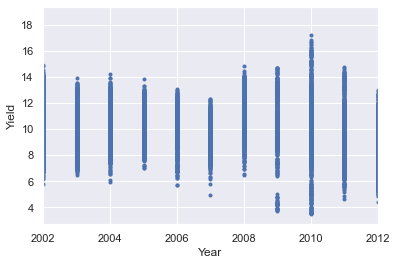

In [44]:
plt.plot('Year', 'Yield', data = df, marker = '.', linestyle='none')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xlim(2002,2012)
plt.show()


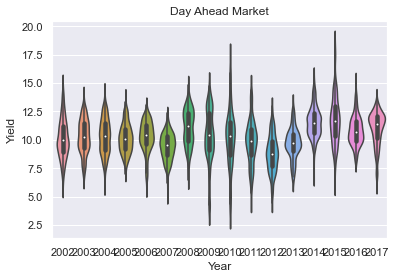

In [45]:
sns.set()

fig, axes = plt.subplots()
sns.violinplot('Year', 'Yield', data = df, ax = axes)
axes.set_title('Yield by Year')

axes.yaxis.grid(True)

plt.show()



## TODO: add in the avg sun rain and temp for the year maybe per location? violin
# weather at a site, avg yield < - learns from the data, 

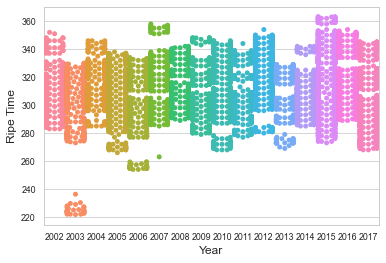

In [27]:
#fig, ax = plt.subplots() < look up
#ax.xaxis.set_ticks(np.arange(2002, 2017, step = 2))
p = sns.swarmplot(x='Year', y='Ripe Time', data = df)
#p.set_xticks(range(8)) < limit ticks to 8
#p.set_xticklabels([str(x) for x in range(2002,2018,2)]) < only did the firt 8 ticks with alt labels.
#p.set_xticklabels([str(x) for x in range(2,18,1)])
#plt.xtick_labels([str(x) for x in range(2002,2018,2)]) < do it in plt  - 
plt.show()



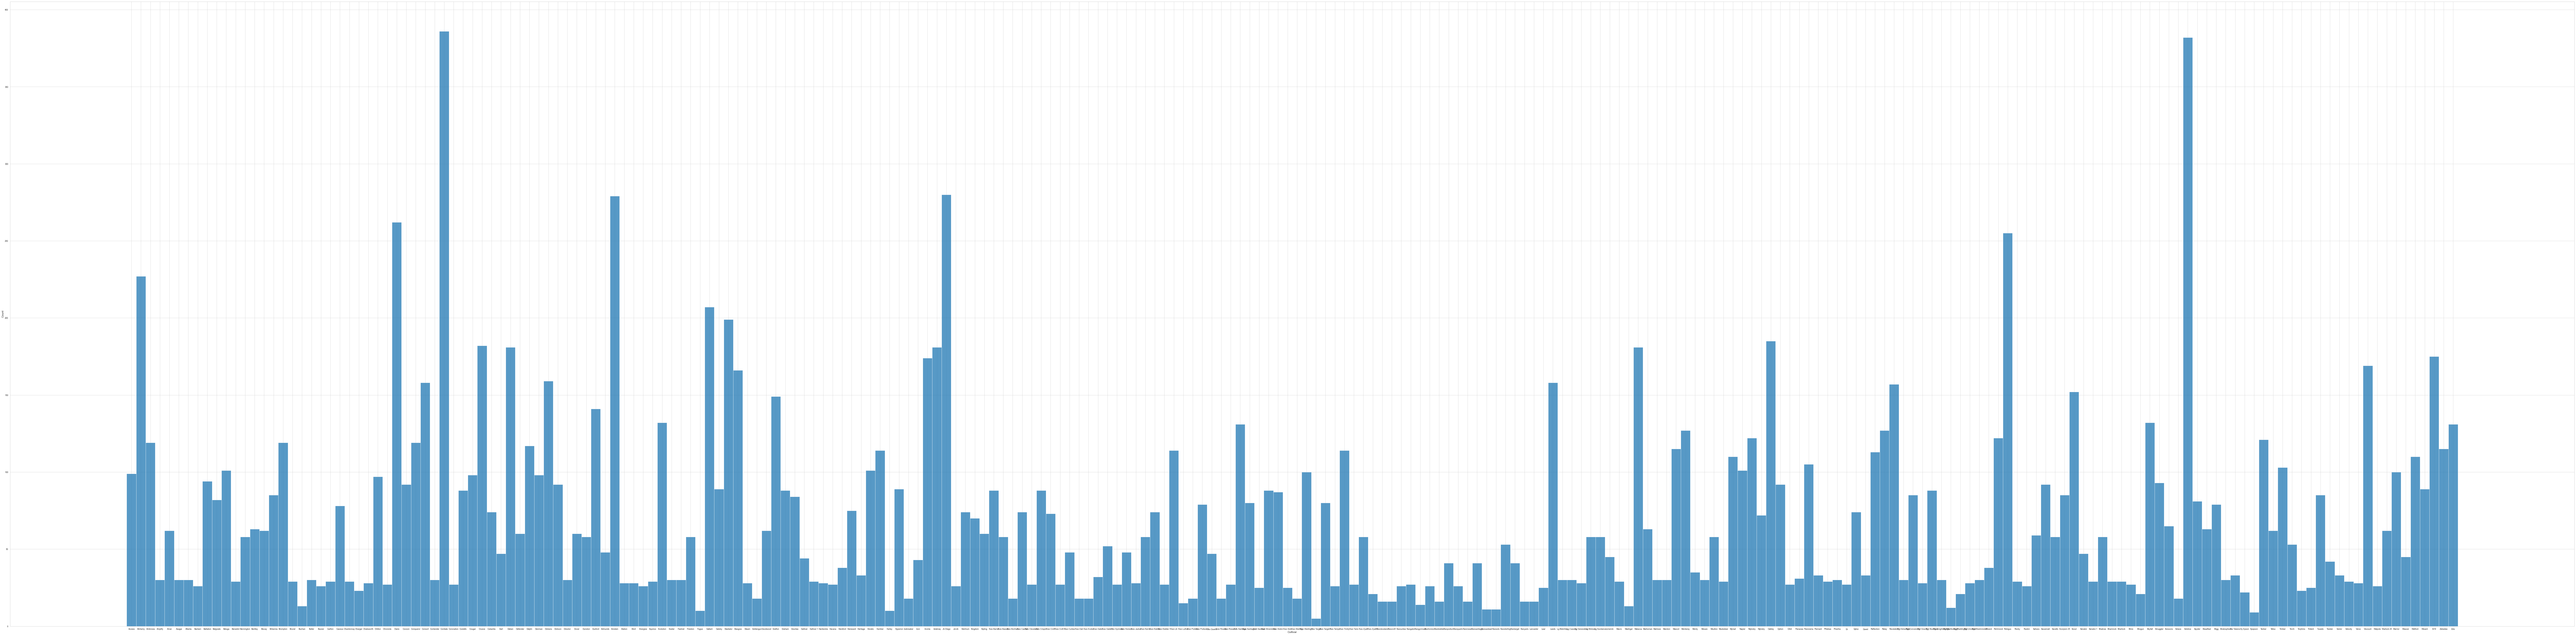

In [7]:
fig, axes = plt.subplots(figsize=(200,50))
sns.histplot(df.Cultivar)
#plt.figure()
plt.show()


# size

Index(['Cordiale', 'Solstice', 'Jb Diego', 'Einstein', 'Claire', 'Robigus',
       'Alchemy', 'Gallant', 'Gladiator', 'Oakley', 'Crusoe', 'Istabraq',
       'Deben', 'Malacca', 'Xi19', 'Invicta', 'Viscount', 'Glasgow', 'Dickens',
       'Leeds', 'Consort', 'Revelation', 'Scout', 'Grafton', 'Duxford',
       'Evolution', 'Skyfall', 'Zulu', 'Kws Santiago', 'Monterey', 'Relay',
       'Richmond', 'Niijinsky', 'Tanker', 'Conqueror', 'Ambrosia', 'Brompton',
       'Delphi', 'Zebedee', 'Mascot', 'Humber', 'Kws Trinity', 'Kws Lili',
       'Reflection', 'Myriad', 'Welford', 'Panorama', 'Timber', 'Horatio',
       'Beluga', 'Napier'],
      dtype='object')
      Cultivar    Region    Region County       Lat    Long  Year Sow Month  \
99     Alchemy   Ragnall  Nottinghamshire  53.25560 -0.7963  2005      1/10   
100    Alchemy   Ccreevy             Down  53.79448 -6.0760  2010      8/10   
101    Alchemy    StBosw           ScBord  55.57080 -2.6475  2014      30/9   
102    Alchemy    StBosw   

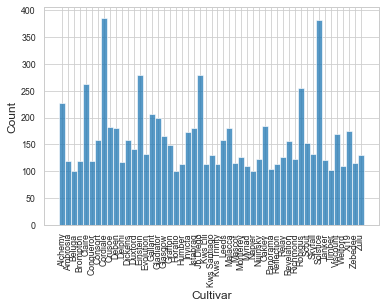

In [20]:
'''Showing the Cultivars with more than 100 records'''

a = df.Cultivar.value_counts()
a = a[a > 100].index # .index, gives the list of the ones we're interested in
print(a)
b=df[df.Cultivar.isin(a)]
print(b)
p = sns.histplot(b.Cultivar)
#p.set_xticks(p.get_xticklabels(),rotation = 30)
plt.xticks(rotation = 90)
plt.show()


#figure out the year per cultivar, 

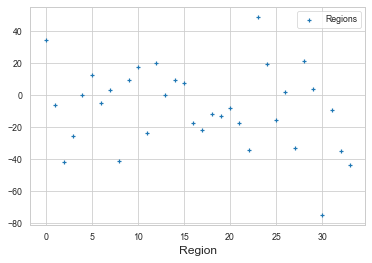

In [29]:
def plot_validation(simfarm):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(np.arange(simfarm.preds.size), simfarm.resi, marker="+", label="Regions") # the size of the yield predictions(gaussian)
    # ax.axhline(np.mean(simfarm.resi), linestyle="-", color="k", label="Mean")
    # ax.axhline(np.median(simfarm.resi), linestyle="--", color="k", label="Median")

    ax.set_xlabel("Region")
    # ax.set_ylabel("$1 - Y_{\mathrm{Pred}} / Y_{\mathrm{True}}$ (%)")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    fig.savefig(
        join(
            PARENT_DIR, "scripts",
            f"Validation{simfarm.cult}.png"),
        bbox_inches="tight")

    return fig

# get the residual - mean


plot = plot_validation(skyfall)
plot.show()

## Regions are only seperate residuals, not connected to actual lat/long?? check order?, index  related 

plot = simfarm.preds.size

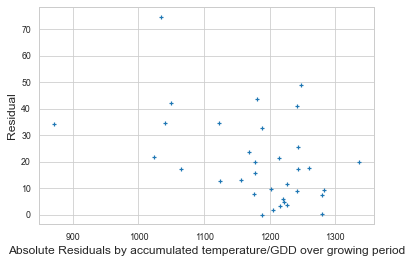

In [103]:
'''The residuals(how far off the prediction is) shown by the accumulated temperature units/GDD'''
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.scatter(np.arange(simfarm.preds.size), simfarm.resi, marker="+", label="Regions")  
# above copied from validation plaot for reference 'np.arange  equally spaces them where np.linespace does it better for decimals
ax.scatter(skyfall.predict_temp, abs(skyfall.resi), marker = '+')


# plt.hist(skyfall.predict_temp, label = 'validate')
ax.set_xlabel('Absolute Residuals by accumulated temperature/GDD over growing period')
ax.set_ylabel('Residual')
# plt.legend()

plt.show()

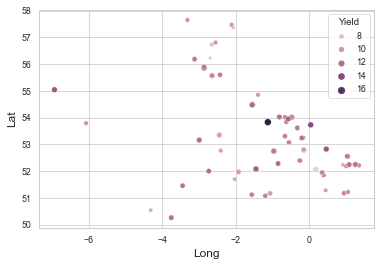

In [98]:
'''Find the regions of Skyfall, showing yield by Region'''

df = df[df.Cultivar == 'Skyfall']
# print(df)
sns.scatterplot(df.Long, df.Lat, size =df.Yield, hue=df.Yield)
plt.show()

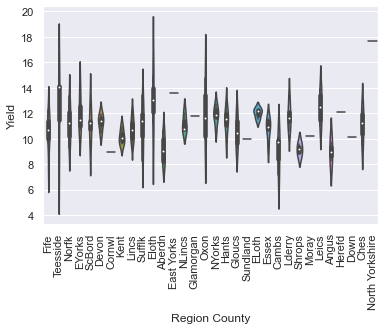

In [80]:
'''the Skyfall Yields by location'''
df = df[df.Cultivar == 'Skyfall']
# print(df)
# sns.scatterplot(df['Region County'], df.Yield, hue = df.Yield)
sns.violinplot('Region County', 'Yield', data = df)
plt.xticks(rotation=90)
plt.show()

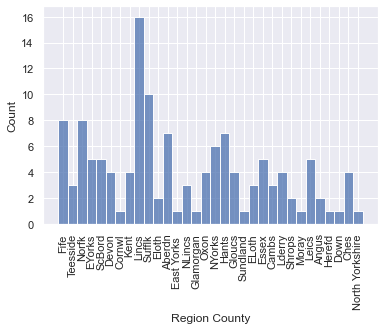

32


In [69]:
'''the unique region/counties of Skyfall'''
sns.histplot(data=df, x=df['Region County'])
plt.xticks(rotation = 90)
plt.show()
a = df['Region County'].unique()
print(len(a))

In [36]:
'''the different between 1 - predicted/observed
so when the prediction is the same as the observed it will be 0'''
def print_yield(simfarm):
    simfarm.preds

print(skyfall.resi.head(10))


14281    34.486092
14328    -6.087726
14300   -41.950269
14271   -25.353731
14287    -0.061146
14309    12.584835
14288    -4.686850
14292     3.347938
14244   -41.155819
14294     9.254797
Name: Yield, dtype: float64


In [37]:
# need to define
flat_samples = skyfall.model.get_chain(discard=1000, thin=100, flat=True)


# needed to print errors below
# Extract the errors on the fitted parameters
skyfall.param_errors = np.std(flat_samples, axis=0)
mu_t_err, sig_t_err, mu_p_err, sig_p_err, mu_s_err, sig_s_err, rho_tp_err, rho_ts_err, rho_ps_err = skyfall.param_errors


# print outputs
print("================ Model Parameters ================")
print("mu_t (mean temperature +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_t"], mu_t_err))
print("sig_t (standard deviation temperature +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_t"], sig_t_err))
print("mu_p (mean precipitation +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_p"], mu_p_err))
print("sig_p (standard deviation precipitation +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_p"], sig_p_err))
print("mu_s (mean sunshine +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_s"], mu_s_err))
print("sig_s (standard deviation sunshine +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_s"], sig_s_err))
print("rho_tp (temperature and precipitation correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_tp"], rho_tp_err))
print("rho_ts (temperature and sunshine correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_ts"], rho_ts_err))
print("rho_ps (precipitation and sunshine correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_ps"], rho_ps_err))

            #  what is the error telling me and why is it sooo huge???

================ Model Parameters ================
mu_t (mean temperature +/- error) = 806.583 +/- 176.745
sig_t (standard deviation temperature +/- error) = 626.067 +/- 84.561
mu_p (mean precipitation +/- error) = 891.480 +/- 93.992
sig_p (standard deviation precipitation +/- error) = 706.031 +/- 64.061
mu_s (mean sunshine +/- error) = 1623.455 +/- 120.879
sig_s (standard deviation sunshine +/- error) = 609.600 +/- 87.223
rho_tp (temperature and precipitation correlation +/- error) = -0.169 +/- 0.148
rho_ts (temperature and sunshine correlation +/- error) = -0.007 +/- 0.141
rho_ps (precipitation and sunshine correlation +/- error) = -0.070 +/- 0.142


[1122.8256108  1221.05733765 1049.26520441 1243.71502348 1188.72936398
 1124.68274114 1221.3602867  1215.79067736 1241.01712172 1282.93593378
 1259.52146922 1168.12160708 1336.05669285 1279.61332139 1202.67698434
 1280.08449185 1243.78381907 1215.01375381 1226.33050428 1156.86755283
 1176.75378568 1064.74733741  871.87793734 1248.55233412 1177.43582239
 1178.32353016 1205.30702889 1188.14884752 1023.04598967 1226.33612817
 1034.54341226 1242.45180676 1040.05879263 1180.1931779 ]


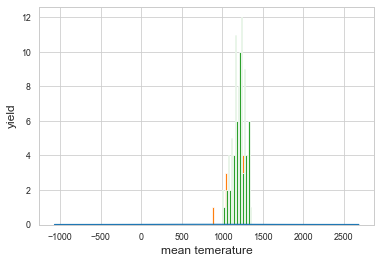

In [203]:
# printing the learned(?) temp distribution

import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

mu = skyfall.mean_params["mu_t"]
sigma = skyfall.mean_params["sig_t"]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
orig= skyfall.predict_temp
y = np.zeros(34)
print(orig)
plt.plot(x, 16*stats.norm.pdf(x, mu, sigma)) # set y scale to log, 
plt.hist(orig, bins = 20)
plt.hist(skyfall.train_temp, bins=20)
ax.set_xlabel('mean temerature')
ax.set_ylabel('yield')

plt.show()

# plot real data (temperature) points to compare TODO
# what location/year? -ve temp?

# seabourne pair grid. check out/ triangle plots

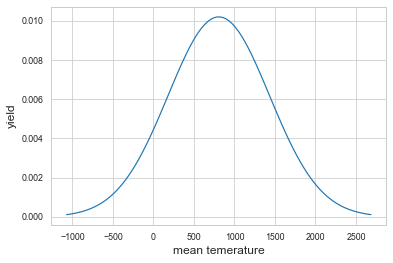

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

mu = skyfall.mean_params["mu_t"]
sigma = skyfall.mean_params["sig_t"]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 16*stats.norm.pdf(x, mu, sigma))
# print(stats.norm.cdf(x))
ax.set_xlabel('mean temerature')
ax.set_ylabel('yield')

plt.show()

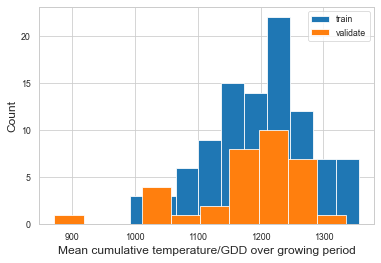

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.hist(skyfall.train_temp, label= 'train')
plt.hist(skyfall.predict_temp, label = 'validate')
ax.set_xlabel('Mean cumulative temperature/GDD over growing period')
ax.set_ylabel('Count')
plt.legend()

plt.show()

# choose

In [99]:
print(skyfall.predict_rain)

[1579.93504042  760.38460353  617.52766964  617.54037518  460.03363464
  357.64344729  743.54820001  619.44955699  573.55036087  529.92407135
  538.00693551  614.82864597  447.95105783  510.7121145   602.78362513
  541.73214947  629.48767572  662.68920228  541.47305785  798.66634071
  640.12233467  523.36327167  904.64691703  445.98497218  639.0248249
  695.65202971  656.82290251  659.35415848 1340.15060987  675.66295807
  562.8258176  1191.22455017  810.44822678  987.54568327]


In [113]:
print(skyfall.mean_params)
type(skyfall.mean_params)

{'mu_t': 806.5827883217663, 'sig_t': 626.0673260328231, 'mu_p': 891.4803365156233, 'sig_p': 706.0311223396898, 'mu_s': 1623.4545588917804, 'sig_s': 609.6003049503736, 'rho_tp': -0.16908405064198928, 'rho_ts': -0.0067972470290862536, 'rho_ps': -0.07023846486755189}


dict

In [ ]:
#TODO :# go through the GDD - what is the 21 and 35 all about
def gdd_calc(tempmin, tempmax):

    gdd = np.zeros(tempmin.shape[0])
    for ind in range(tempmin.shape[1]):

        tmaxs = tempmax[:, ind]
        tmins = tempmin[:, ind]

        if np.sum(tmaxs) == np.sum(tmins) == 0:
            break

        tmaxs[np.logical_and(gdd < 395, tmaxs > 21)] = 21
        tmaxs[np.logical_and(gdd >= 395, tmaxs > 35)] = 35 # possibly crop stress above this/generally acceptable, can this be learned from the data.

        gdd += (tmaxs - tmins) / 2

    return gdd


How do we add a prior? - better to learn from the model (if only one record of 35 degrees then harder to learn from the data)

      Cultivar     Region Region County      Lat    Long  Year Sow Month  \
14233  Skyfall       Elie          Fife  52.3995 -0.2624  2015     13/10   
14234  Skyfall      Croft      Teesside  54.4835 -1.5551  2015      25/9   
14235  Skyfall     Morley         Norfk  52.5547  1.0396  2015      2/10   
14236  Skyfall  Tibthorpe        EYorks  53.9836 -0.5368  2016      3/10   
14237  Skyfall     StBosw        ScBord  55.5708 -2.6475  2015      25/9   

       Ripe Time  Yield  
14233        NaN  12.27  
14234      331.0  14.23  
14235      304.0  12.07  
14236      324.0  11.50  
14237      337.0  13.10  


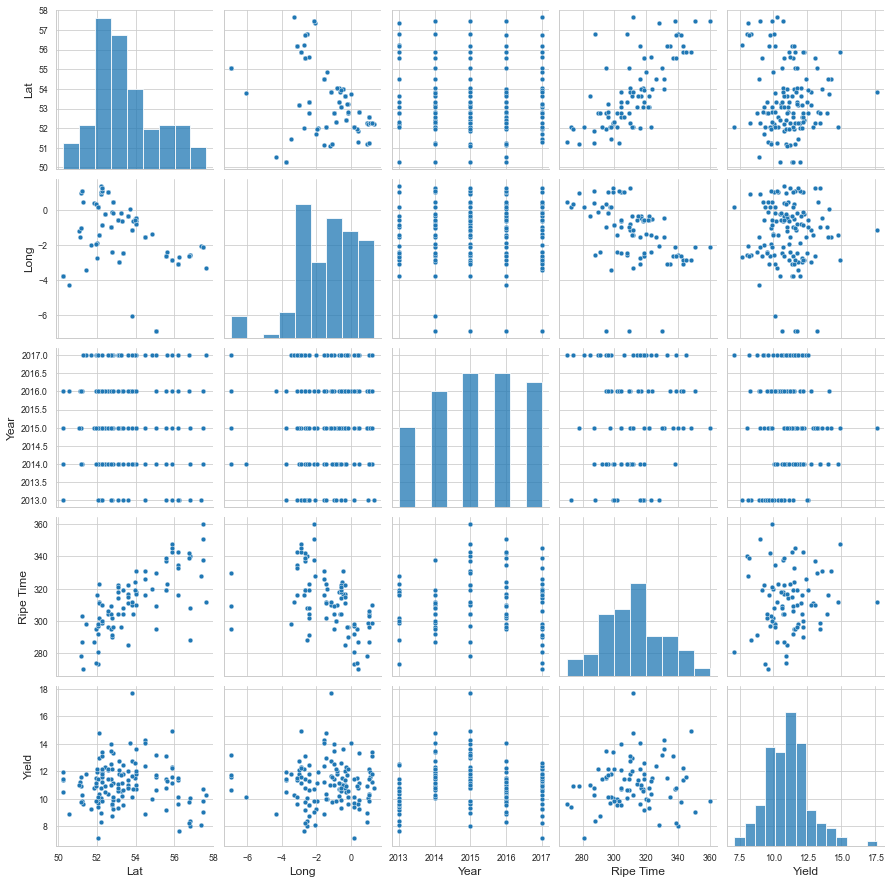

In [90]:
'''looking at skyfall only'''
print(df.head())
sns.pairplot(df)
plt.show()

# draw grid of lat/longs, why are long correlated to ripe time?

In [183]:
'''Add the weather'''
sns.pairplot(skyfall.predict_temp, skyfall.predict_rain)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [139]:
import random

gdd = 390
tmax = random.sample(range(1,20), 12) # set a fake tmaxs
print(tmax)
for ind in range(12):
    print(ind)
    tmaxs = tmax[:, ind]
    print(tmaxs)
    
tmaxs[np.logical_and(gdd < 395, tmaxs > 21)] = 21
print(tmaxs)

# re-write function - maybe without for loop.

[10, 12, 19, 17, 5, 13, 2, 8, 16, 6, 7, 18]
0


TypeError: list indices must be integers or slices, not tuple

In [200]:
print(skyfall.temp_min[0])
print(skyfall.therm_days[0])
print(skyfall.temp_min.shape)

[ 6.59216946e+00  6.09186201e+00  6.62455809e+00  1.02601427e+01
  1.09887790e+01  1.10981584e+01  1.13377330e+01  7.45589199e+00
  8.87696976e-01  3.66877675e-01  6.95542111e+00  3.47169176e+00
  4.97601798e+00  3.99905461e+00  3.36805979e+00  3.73966660e+00
  2.15858499e+00  3.72604051e+00  1.59116610e+00  4.55375057e+00
  7.36317965e+00  5.24476619e+00  5.42600678e+00  1.45271231e+00
  3.89771245e+00  9.32426272e+00  9.65210203e+00  6.60686273e+00
  7.98421244e+00  8.33171328e+00  7.27644904e-01  3.19052373e+00
  1.01834805e+01  5.93888690e+00  6.22284509e+00  4.39469581e+00
  3.18795871e+00  6.18844983e+00  5.40672456e+00  4.86487501e+00
  4.37596492e+00 -1.31746150e+00 -1.61558401e+00 -1.08191246e+00
  5.63129850e-01  2.61309920e+00  2.81886530e+00  1.49363934e+00
 -1.61344888e+00  8.20768164e-01  1.89195662e+00  1.86721198e+00
  1.03782377e+00 -8.38141305e-01 -8.47243959e-01  1.29653516e+00
  2.25466791e+00  6.54263087e+00  5.07450117e+00  5.46262775e+00
  4.44728028e+00  4.10286

In [184]:
print(skyfall.log_initial_spread)
# what even is this?

[5.298317366548036, 5.0106352940962555, 5.298317366548036, 5.0106352940962555, 5.521460917862246, 5.0106352940962555, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453]


In [195]:
print(skyfall.flat_samples[0])
print(skyfall.flat_samples.size)
print(skyfall.flat_samples.shape)

# maybe all flat in one axis 123 location x 361 days?

[ 1.36068698e+03  4.38745885e+02  9.65898649e+02  6.47689573e+02
  7.92138108e+02  1.01535048e+03 -2.44723842e-01  8.90663005e-02
 -4.52451344e-01]
1665000
(185000, 9)


In [204]:
# are the logical statements in gdd used - cal with and without
 needs to be


min  temp - dont count below it, min base temp - might be 10 (weather needs to get above this)
max temp - don't count above, or detrimental effects
395, cut off from one growth stage, 
dont spend too long on these. must do, 
message, 
go back in code to see what was before. 
see if its useful

facyntion script - should be locked away from published paper - ask seb